In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
# Read dataset
train = pd.read_csv("Train Dataset.csv")
test = pd.read_csv("Test Dataset.csv")
var = pd.read_csv("Variable_Definitions.csv") 
submission = pd.read_csv("Sample Submission.csv")

In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [5]:
train.columns = train.columns.str.lower()

In [6]:
var

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [7]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [8]:
train.columns = train.columns.str.lower()

In [9]:
train.shape, test.shape

((7303, 14), (2697, 13))

In [10]:
# train["type"] = "train"
# test["type"] = "test"

In [11]:
train.target.value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

In [12]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
train.corr()["target"].drop("target")

age        -0.002846
sex         0.030608
cp         -0.198082
trestbps    0.009320
chol       -0.012291
fbs         0.003925
restecg     0.005911
thalach    -0.004634
exang       0.481897
oldpeak     0.004899
slope       0.001909
ca         -0.008244
thal        0.005709
Name: target, dtype: float64

<Axes: >

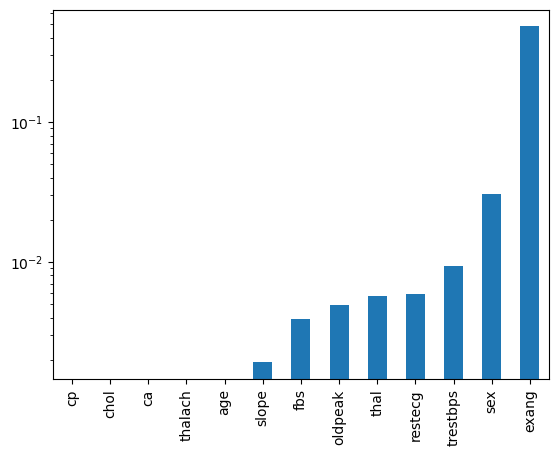

In [14]:
train.corr()["target"].drop("target").sort_values().plot(kind="bar", logy=True)

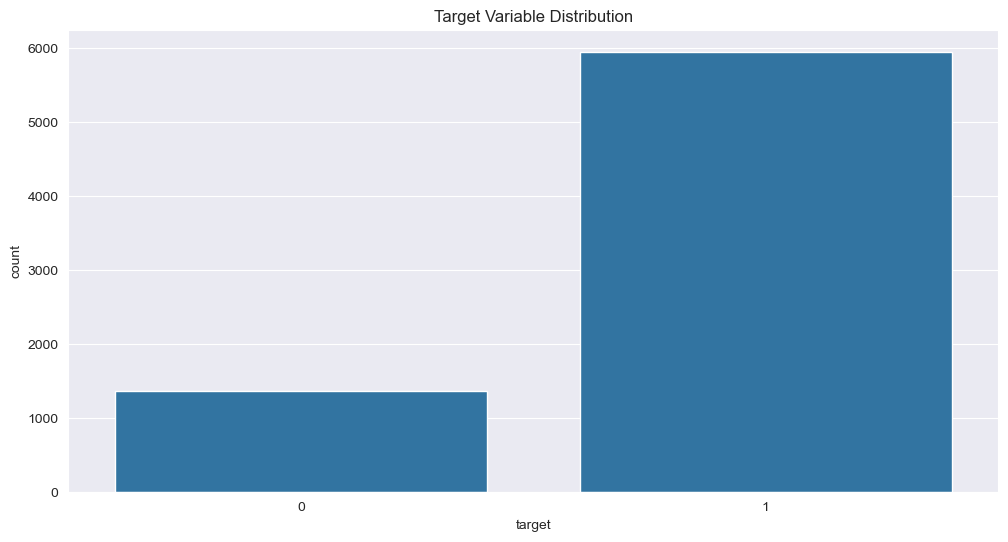

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=train)
plt.title('Target Variable Distribution')
plt.show()

In [16]:
train_df = train.copy()
test_df = test.copy()

In [17]:
train["trestbps"].describe()

count    7303.000000
mean      147.447487
std        31.099538
min        94.000000
25%       120.000000
50%       148.000000
75%       174.000000
max       200.000000
Name: trestbps, dtype: float64

In [281]:
data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
# data.drop("target", axis=1, inplace=True)

In [282]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    # Scaling features
    # scaler = StandardScaler()
    # scaled_features = scaler.fit_transform(df[['trestbps', 'thalach']])
    # df[['trestbps_scaled', 'thalach_scaled']] = scaled_features


    # One-Hot Encoding for categorical variables
    # ohe = OneHotEncoder()
    # cp_encoded = ohe.fit_transform(df[['cp']])
    # cp_columns = [f'cp_{int(i)}' for i in range(cp_encoded.shape[1])]
    # df[cp_columns] = cp_encoded.toarray()

    # Polynomial features
    # poly_cols = ['age', 'chol', 'trestbps', 'thalach']
    # poly_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']	
    # poly_cols = ['oldpeak', 'thalach', 'chol', 'exang']
    # poly = PolynomialFeatures(degree=2, include_bias=False)
    # poly_features = poly.fit_transform(df[poly_cols])
    # poly_feature_names = poly.get_feature_names_out(poly_cols)
    # # df[poly_feature_names] = poly_features
    # pd.concat([df, pd.DataFrame(poly_features, columns=poly_feature_names)], axis=1)

    # Interaction terms (example for oldpeak and slope)
    # df['oldpeak_slope_interaction'] = df['oldpeak'] * df['slope']
    # df['exang_cp_interaction'] = df['exang'] * df['cp']
    # df['oldpeak_restecg_interaction'] = df['oldpeak'] * df['restecg']
    # df['age_chol_interaction'] = df['age'] * df['chol']
    # df['thalach_cp_interaction'] = df['thalach'] * df['cp']

    # df['heart_health_score'] = df['trestbps'] + df['chol'] + df['thalach']

    # Binarizing Fasting Blood Sugar
    # df['fbs_binary'] = df['fbs'].apply(lambda x: 1 if x > 120 else 0)

    # df['age_bin'] = pd.cut(df['age'], bins=[20, 40, 60, 80], labels=[0, 1, 2]).astype("int")
    # df['chol_bin'] = pd.cut(df['chol'], bins=[120, 240, 360, 600], labels=[0, 1, 2]).astype("int")
    # # df['trestbps_bin'] = pd.cut(df['trestbps'], bins=[94, 120, 140, 160, 200], labels=[0, 1, 2, 3])


    # # df['chol_log'] = np.log1p(df['chol'])
    # # df['trestbps_log'] = np.log1p(df['trestbps'])
    # df['oldpeak_log'] = np.log1p(df['oldpeak'])

    # df['chol_log'] = np.log(df['chol'] + 1)
    # df['oldpeak_log'] = np.log(df['oldpeak'] + 1)

    # # Dropping original columns
    # df = df.drop(columns=['age', 'chol'])
    # # df = df.drop(columns=['cp'])

    return df

In [283]:
data = preprocess(data)

In [284]:
pre_train = data[data.index < train_df.shape[0]]
pre_test = data[data.index >= train_df.shape[0]].drop(columns=['target'])

In [285]:
pre_train.shape, pre_test.shape

((7303, 587), (2697, 586))

In [286]:
train_.shape

(7303, 585)

In [287]:
train_ = preprocess(train_df)
test_ = preprocess(test_df)

In [288]:
len(train_.columns)

587

### Modelling

In [289]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold


In [290]:
X = pre_train.drop(["target"], axis=1)
y = pre_train["target"]

In [291]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
LogReg = LogisticRegression()
LogReg.fit(train_X, train_y)
LogReg_pred = LogReg.predict(val_X)
LogReg_accuracy_train = accuracy_score(train_y, LogReg.predict(train_X))    
LogReg_accuracy_test = accuracy_score(val_y, LogReg_pred)
LogReg_f1 = f1_score(val_y, LogReg_pred,)
# LogReg_f1

/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [293]:
print("Logistic Regression")
print("Accuracy on training set: ", LogReg_accuracy_train)
print("Accuracy on test set: ", LogReg_accuracy_test)
print("F1 score: ", LogReg_f1)


Logistic Regression
Accuracy on training set:  0.8081136597055802
Accuracy on test set:  0.8158795345653662
F1 score:  0.8947985921001174


In [198]:
logreg_predictions = LogReg.predict(pre_test)
submission["target"] = logreg_predictions.astype(int)
submission.to_csv("LogReg.csv", index=False)

In [76]:
X.shape, test.shape

((7303, 581), (2697, 13))

In [77]:
predictions1 = []
scores = []
i=0

# fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier1 = LogisticRegression()
    classifier1.fit(X_train, y_train)
    preds=classifier1.predict(X_test)
    score = accuracy_score(y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions1.append(classifier1.predict(test_))
    i += 1


print(np.mean(scores))

/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.7987679671457906


/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8138261464750172


/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.7980835044490076


/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.821917808219178
Accuracy:  0.8116438356164384
0.8088478523810864


/Users/gbotemi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
predictions2 = []
scores = []
i=0

params = {'learning_rate': 0.01, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 6, 
          'scale_pos_weight': 5.0, 
          'n_estimators': 1000,
          'num_leaves': 31,
          'random_state': 42,
          }


# fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
fold = KFold(n_splits=5)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier2 = LGBMClassifier(**params)
    classifier2.fit(X_train, y_train)
    preds=classifier2.predict(X_test)
    score = accuracy_score(y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions2.append(classifier2.predict(test_))
    i += 1


print(np.mean(scores))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4766, number of negative: 1076
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84874
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 580
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.815817 -> initscore=1.488257
[LightGBM] [Info] Start training from score 1.488257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

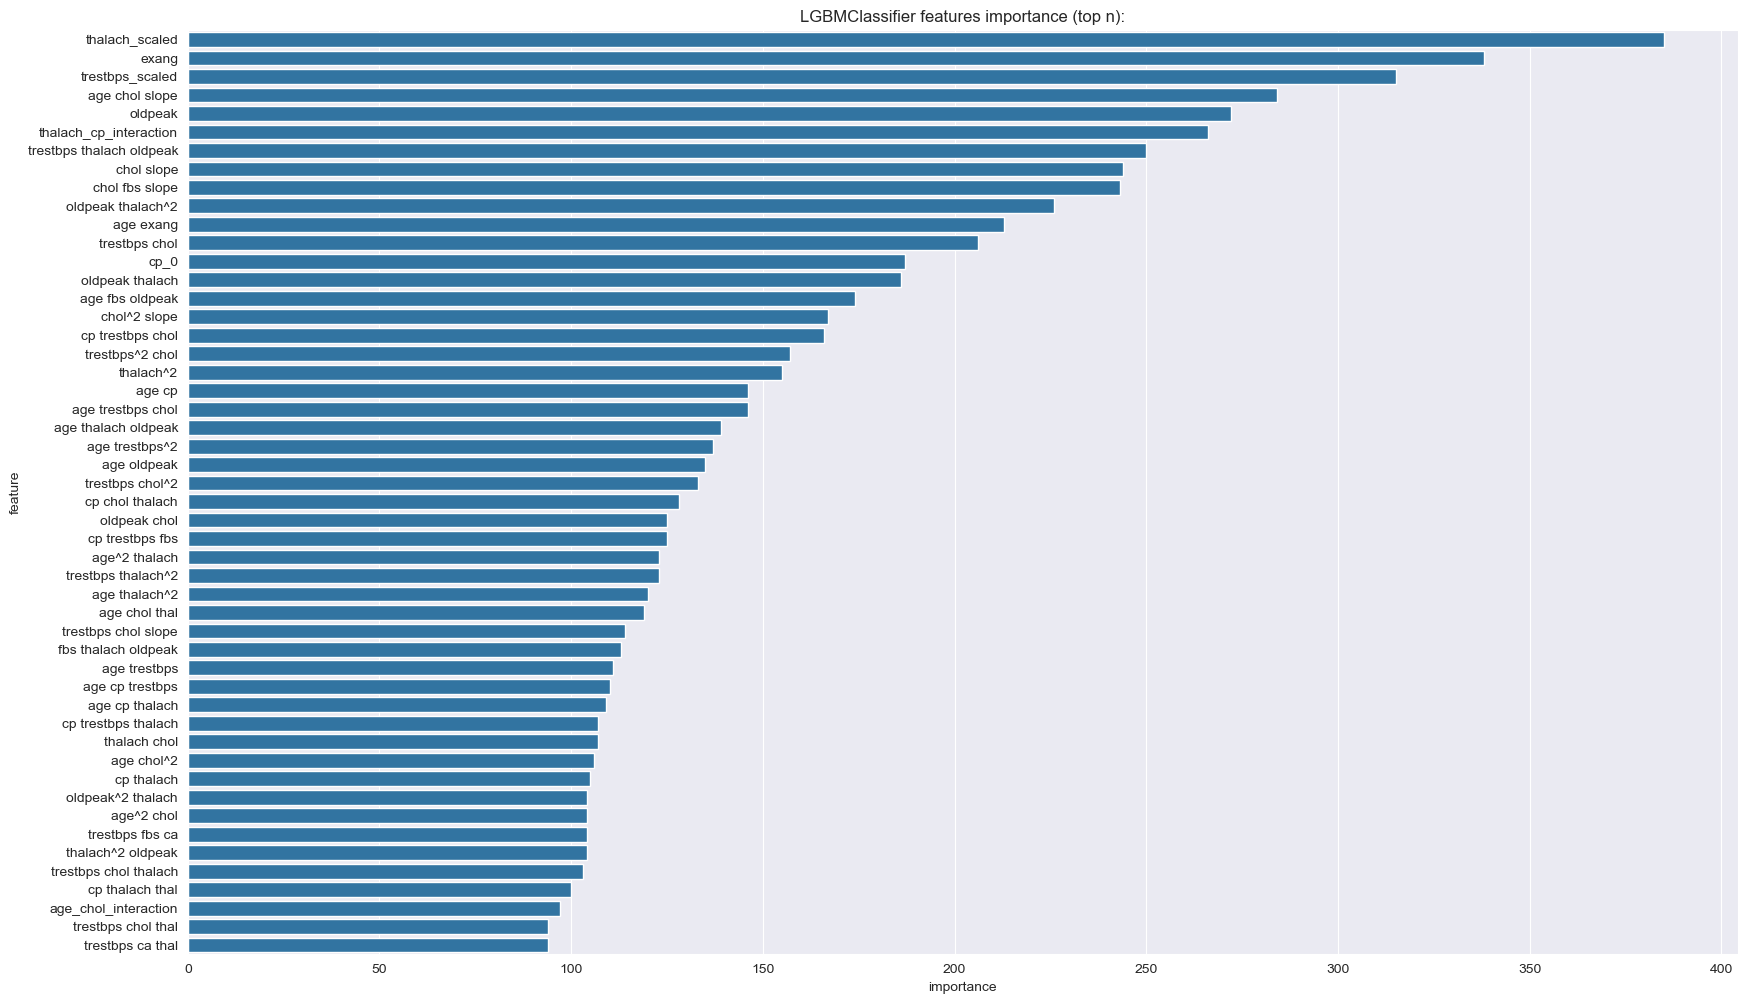

In [63]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [33]:
predictions3 = []
scores = []
i=0

params = {'learning_rate': 0.01, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 1000
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier3 = XGBClassifier(**params)
    classifier3.fit(X_train, y_train)
    preds=classifier3.predict(X_test)
    score = accuracy_score(y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions3.append(classifier3.predict(test_))
    i += 1


print(np.mean(scores))

Accuracy:  0.8153214774281806
Accuracy:  0.8153214774281806
Accuracy:  0.8125854993160054
Accuracy:  0.821917808219178
Accuracy:  0.8178082191780822
Accuracy:  0.8205479452054795
Accuracy:  0.8
Accuracy:  0.8082191780821918
Accuracy:  0.8054794520547945
Accuracy:  0.8205479452054795
0.8137749002117571


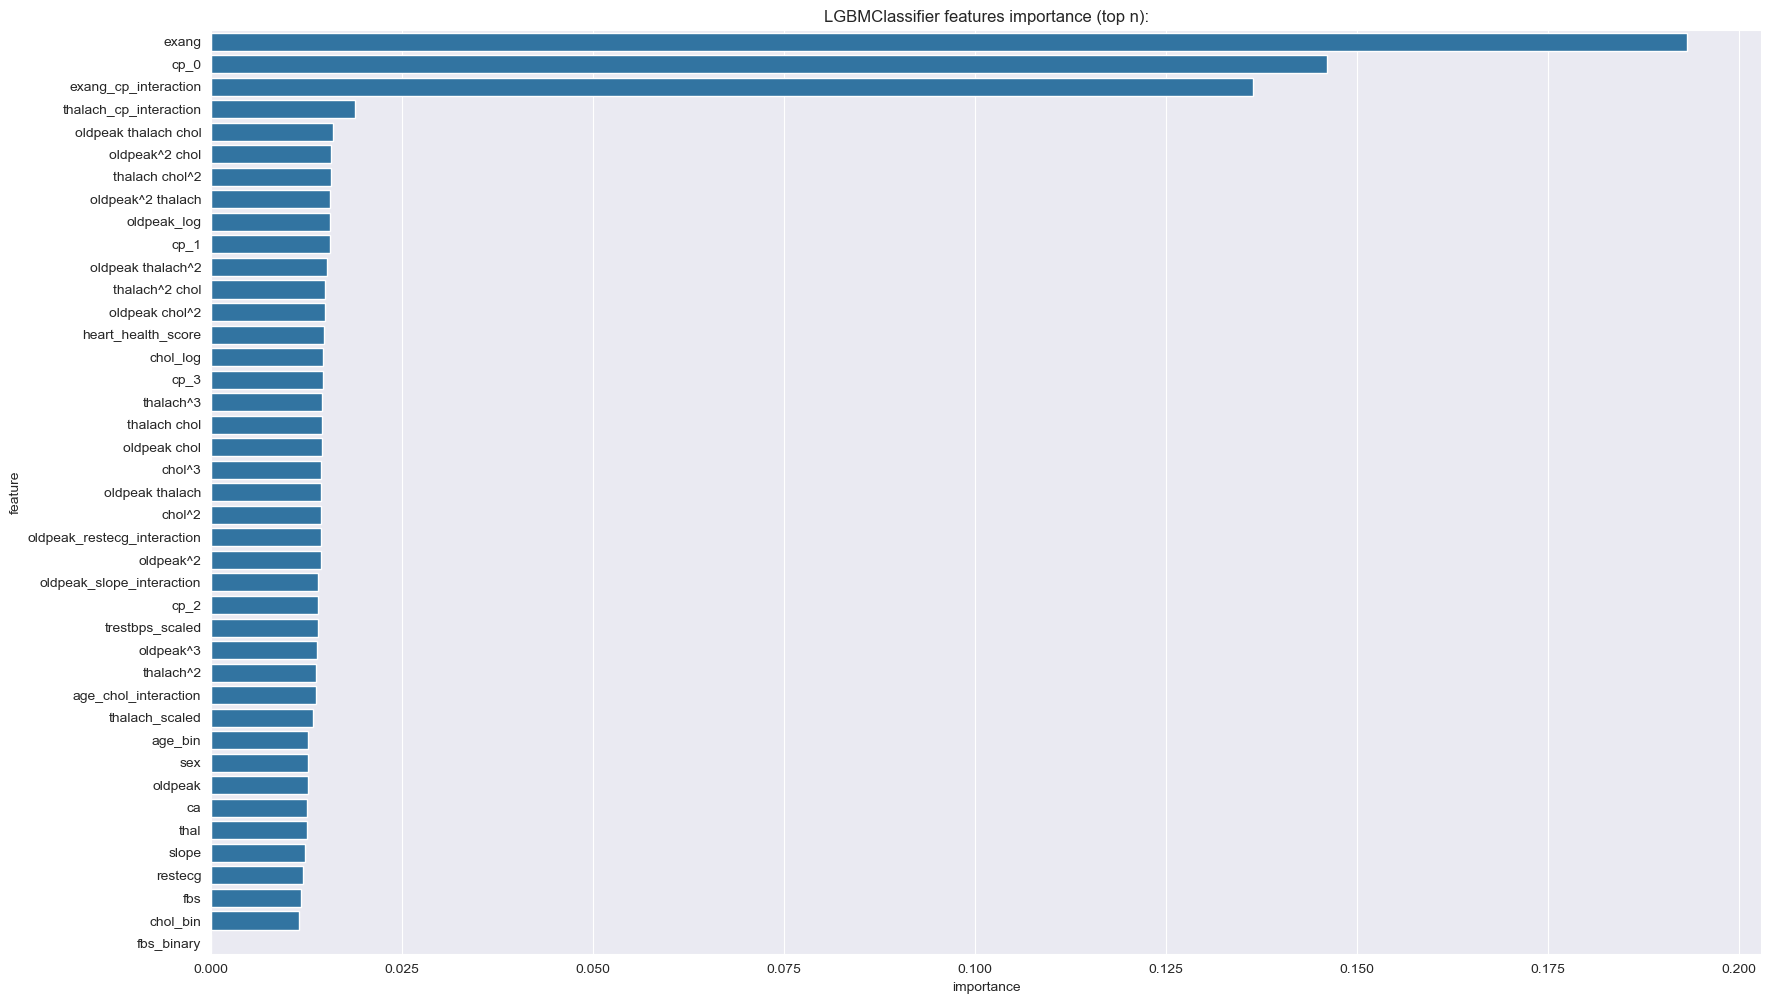

In [34]:
feature_importance_df = pd.DataFrame(classifier3.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [78]:
predictions4 = []
scores = []
i=0

params = {'learning_rate': 0.01, 
          'subsample': 0.2128564969905326, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 1000,
          'eval_metric': 'Accuracy',
          'od_wait':200,
          'bootstrap_type':'Bernoulli',
          'metric_period':100,
          'use_best_model':True
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    classifier4 = CatBoostClassifier(**params)
    classifier4.fit(X_train, y_train, 
            eval_set=[(X_train,y_train),(X_test, y_test)], 
            early_stopping_rounds=200,verbose=100)
    preds=classifier4.predict(X_test)
    score = accuracy_score(y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions4.append(classifier4.predict(test_))
    i += 1


print(np.mean(scores))

0:	learn: 0.9486068	test: 0.9486068	test1: 0.9077901	best: 0.9077901 (0)	total: 603ms	remaining: 10m 2s
100:	learn: 0.9457762	test: 0.9457762	test1: 0.9459459	best: 0.9463434 (4)	total: 59.8s	remaining: 8m 52s
200:	learn: 0.9458647	test: 0.9458647	test1: 0.9459459	best: 0.9463434 (4)	total: 1m 57s	remaining: 7m 47s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9463434022
bestIteration = 4

Shrink model to first 5 iterations.
Accuracy:  0.8153214774281806


0:	learn: 0.9481272	test: 0.9481272	test1: 0.9088739	best: 0.9088739 (0)	total: 595ms	remaining: 9m 54s
100:	learn: 0.9458276	test: 0.9458276	test1: 0.9454835	best: 0.9454835 (2)	total: 59.5s	remaining: 8m 50s
200:	learn: 0.9458718	test: 0.9458718	test1: 0.9454835	best: 0.9454835 (2)	total: 1m 59s	remaining: 7m 55s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9454834859
bestIteration = 2

Shrink model to first 3 iterations.
Accuracy:  0.8125854993160054


0:	learn: 0.9493654	test: 0.9493654	test1: 0.8881815	best: 0.8881815 (0)	total: 567ms	remaining: 9m 26s
100:	learn: 0.9458276	test: 0.9458276	test1: 0.9454835	best: 0.9454835 (2)	total: 58.8s	remaining: 8m 43s
200:	learn: 0.9458718	test: 0.9458718	test1: 0.9454835	best: 0.9454835 (2)	total: 1m 57s	remaining: 7m 45s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9454834859
bestIteration = 2

Shrink model to first 3 iterations.
Accuracy:  0.8125854993160054


0:	learn: 0.9470240	test: 0.9470240	test1: 0.9171975	best: 0.9171975 (0)	total: 591ms	remaining: 9m 50s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (3)	total: 59.4s	remaining: 8m 48s
200:	learn: 0.9460953	test: 0.9460953	test1: 0.9458599	best: 0.9458599 (3)	total: 1m 59s	remaining: 7m 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 3

Shrink model to first 4 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9471566	test: 0.9471566	test1: 0.9179936	best: 0.9179936 (0)	total: 556ms	remaining: 9m 15s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (2)	total: 58.6s	remaining: 8m 41s
200:	learn: 0.9458300	test: 0.9458300	test1: 0.9458599	best: 0.9458599 (2)	total: 1m 57s	remaining: 7m 48s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 2

Shrink model to first 3 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9479084	test: 0.9479084	test1: 0.9108280	best: 0.9108280 (0)	total: 568ms	remaining: 9m 27s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (4)	total: 1m	remaining: 9m
200:	learn: 0.9460069	test: 0.9460069	test1: 0.9458599	best: 0.9458599 (4)	total: 2m 1s	remaining: 8m 2s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 4

Shrink model to first 5 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9467586	test: 0.9467586	test1: 0.9347134	best: 0.9347134 (0)	total: 605ms	remaining: 10m 4s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (1)	total: 57.9s	remaining: 8m 35s
200:	learn: 0.9459185	test: 0.9459185	test1: 0.9458599	best: 0.9458599 (1)	total: 1m 57s	remaining: 7m 46s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 1

Shrink model to first 2 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9472893	test: 0.9472893	test1: 0.9187898	best: 0.9187898 (0)	total: 540ms	remaining: 8m 59s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (3)	total: 1m 3s	remaining: 9m 27s
200:	learn: 0.9459185	test: 0.9459185	test1: 0.9458599	best: 0.9458599 (3)	total: 2m 9s	remaining: 8m 35s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 3

Shrink model to first 4 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9468029	test: 0.9468029	test1: 0.9144108	best: 0.9144108 (0)	total: 635ms	remaining: 10m 34s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (2)	total: 1m 2s	remaining: 9m 15s
200:	learn: 0.9459185	test: 0.9459185	test1: 0.9458599	best: 0.9458599 (2)	total: 2m 11s	remaining: 8m 41s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 2

Shrink model to first 3 iterations.
Accuracy:  0.8136986301369863


0:	learn: 0.9470240	test: 0.9470240	test1: 0.9243631	best: 0.9243631 (0)	total: 719ms	remaining: 11m 58s
100:	learn: 0.9457858	test: 0.9457858	test1: 0.9458599	best: 0.9458599 (2)	total: 1m 1s	remaining: 9m 10s
200:	learn: 0.9460511	test: 0.9460511	test1: 0.9458599	best: 0.9458599 (2)	total: 2m 4s	remaining: 8m 13s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9458598726
bestIteration = 2

Shrink model to first 3 iterations.
Accuracy:  0.8136986301369863
0.8136382887019096


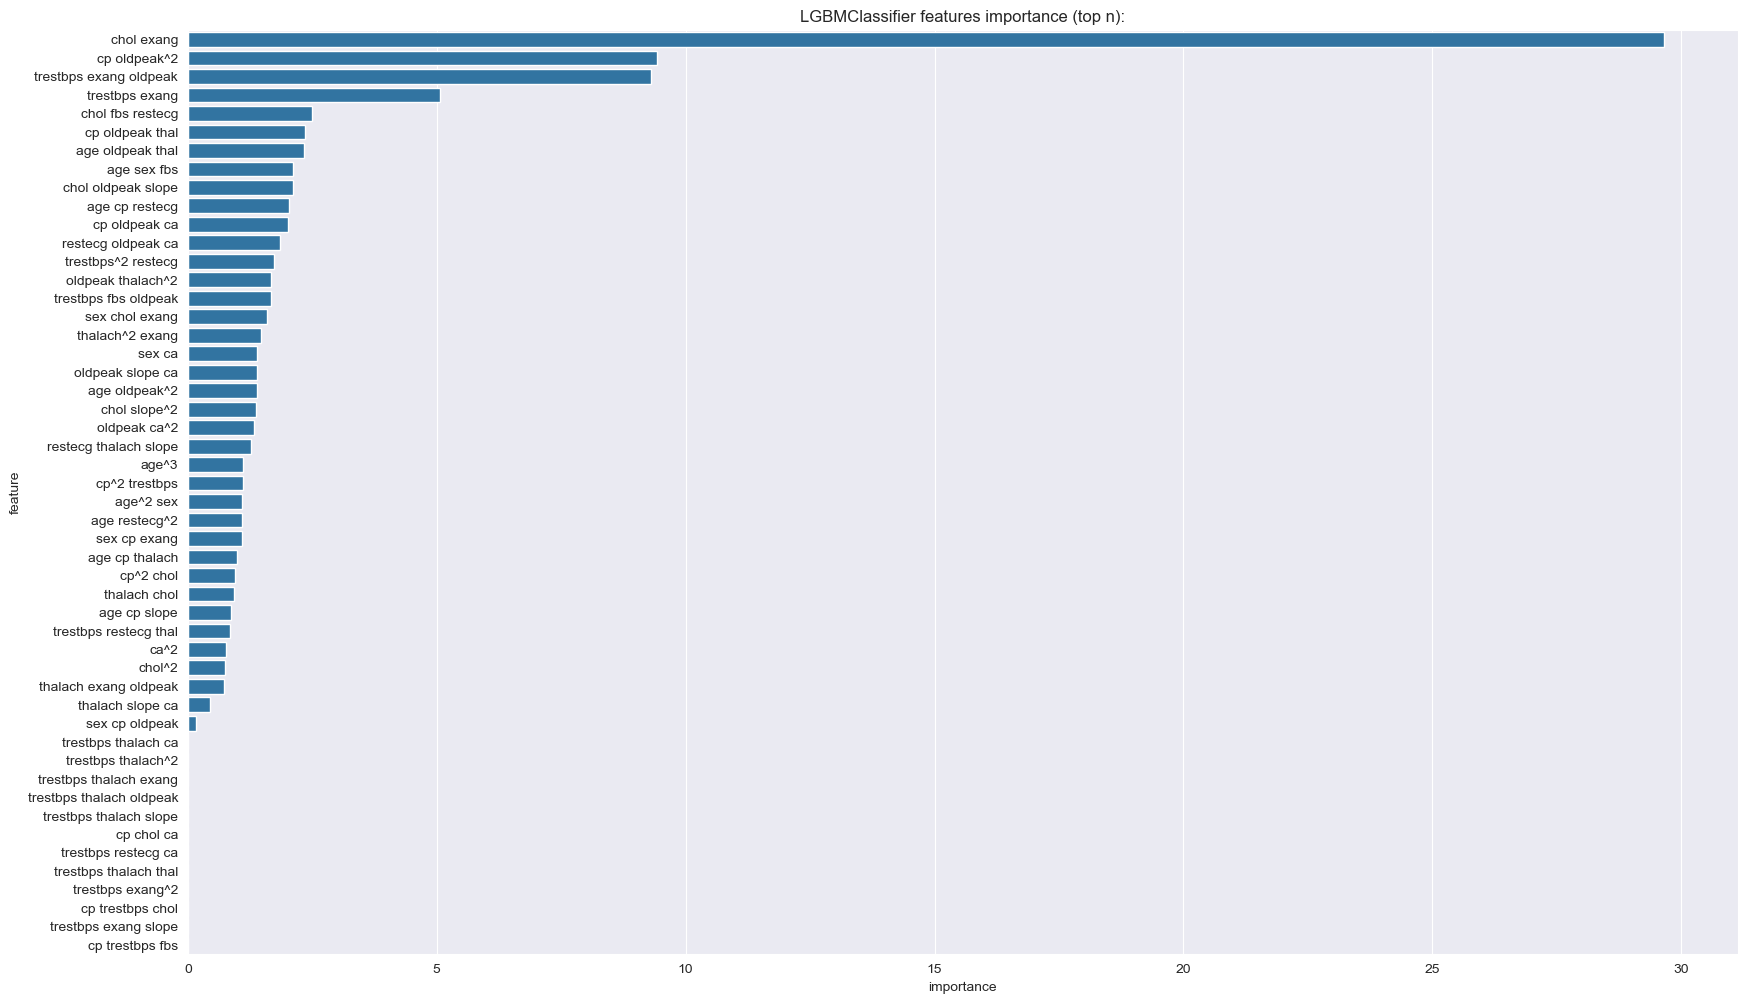

In [79]:
feature_importance_df = pd.DataFrame(classifier4.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [80]:
prediction_df = pd.DataFrame(predictions4)
prediction_df = prediction_df.mode().T
submission["target"] = prediction_df[0].round().astype(int)
submission.to_csv("submission_22_15.csv", index=False)